In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image 
import keras
import cv2
from PIL import ImageFile
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

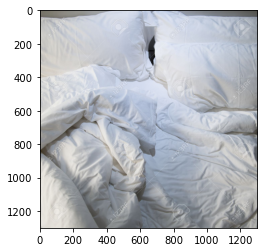

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
img = image.load_img("Datasets/HumanActivityDataset/train/Control/24905349-close-up-of-messy-bedding-sheets-and-pillow.jpg")
plt.imshow(img)

cv2.imread("Datasets/HumanActivityDataset/train/Control/24905349-close-up-of-messy-bedding-sheets-and-pillow.jpg").shape

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
train_dataset = train.flow_from_directory("Datasets/HumanActivityDataset/train/",
                                         target_size = (32,32),
                                            batch_size =3,
                                          class_mode =  "sparse"
                                         )

validation_dataset = validation.flow_from_directory("Datasets/HumanActivityDataset/validation/",
                                         target_size = (32,32),
                                            batch_size =3,
                                          class_mode =  "sparse"
                                         )

Found 4273 images belonging to 6 classes.
Found 58 images belonging to 6 classes.


In [4]:
train_dataset.class_indices
train_dataset.classes

array([0, 0, 0, ..., 5, 5, 5])

In [5]:
validation_dataset.class_indices
validation_dataset.classes

array([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [11]:
cnn = models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])



In [12]:
cnn.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history1 =cnn.fit(train_dataset,
       steps_per_epoch = 50,
       batch_size = 3,
       epochs = 100,
       validation_data = validation_dataset

)

Epoch 1/100
50/50 [==============================] - 1s 25ms/step - loss: 1.7974 - accuracy: 0.2667 - val_loss: 1.6228 - val_accuracy: 0.6897
Epoch 2/100
50/50 [==============================] - 1s 25ms/step - loss: 1.7762 - accuracy: 0.2200 - val_loss: 1.5305 - val_accuracy: 0.6897
Epoch 3/100
50/50 [==============================] - 1s 18ms/step - loss: 1.7557 - accuracy: 0.2133 - val_loss: 1.6678 - val_accuracy: 0.3793
Epoch 4/100
50/50 [==============================] - 2s 40ms/step - loss: 1.7676 - accuracy: 0.2467 - val_loss: 1.7039 - val_accuracy: 0.3793
Epoch 5/100
50/50 [==============================] - 2s 41ms/step - loss: 1.6750 - accuracy: 0.3000 - val_loss: 1.3850 - val_accuracy: 0.6552
Epoch 6/100
50/50 [==============================] - 2s 44ms/step - loss: 1.5863 - accuracy: 0.3533 - val_loss: 1.6687 - val_accuracy: 0.2586
Epoch 7/100
50/50 [==============================] - 1s 24ms/step - loss: 1.6206 - accuracy: 0.3581 - val_loss: 1.6392 - val_accuracy: 0.2414
Epoch 

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

<Figure size 432x288 with 0 Axes>

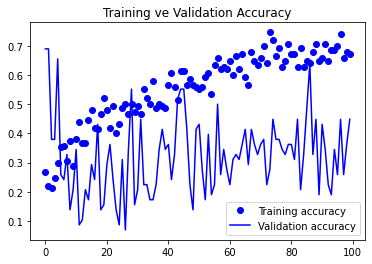

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training ve Validation Accuracy')
plt.legend()
plt.figure()